In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head()
data.tail()
n = len(data['card_id'])

In [3]:
data.describe()

,amount,site_type,month,y
count,424401.000000,424401.000000,424401.000000,424401.000000
mean,1351.113160,0.227372,1.457977,0.801699
std,1921.271913,0.419135,0.498232,0.398720
min,0.177740,0.000000,1.000000,0.000000
25%,479.720260,0.000000,1.000000,1.000000
50%,710.960000,0.000000,1.000000,1.000000
75%,1160.642200,0.000000,2.000000,1.000000
max,177740.000000,1.000000,2.000000,1.000000


In [4]:
'''check empty cells in table'''
data.count(axis = 0)

card_id        424401
company_id     424401
fuel_id        424401
devision_id    424401
site_id        424401
region_id      424401
amount         424401
site_type      424401
month          424401
lat            424401
lon            424401
y              424401
dtype: int64

In [5]:
'''create vectors, which based on features'''
binary_col = ['site_type', 'month']
nonbinary_col = ['fuel_id', 'devision_id']
data_nonbinary = pd.get_dummies(data[nonbinary_col])
print(data_nonbinary.columns)

Index(['fuel_id_219a923c8bc97a95585464d6f4b62b6165cc132a',
       'fuel_id_4e8e035f56691077c68b3eab775de10b720e5ffe',
       'fuel_id_51290d0d7dc09191bab25e59a6575c246336667b',
       'fuel_id_684a604b71f50a3c4739c1da1a514455d8256d00',
       'fuel_id_9b9b13c1c5ac5dbb27acdbad9a860e3874d380ed',
       'fuel_id_ada0e5d61f7f84e08cac1087c7112ddc0a082444',
       'fuel_id_afc06e4e2f1ae009c025834fd956c0d2848ef615',
       'fuel_id_bd5b689b05dd83fa60590b93b4b0a0428a0fc43c',
       'fuel_id_e0f5182f9a3115e0488a74152f9cb66cbbe38224',
       'devision_id_1917d21be2460e969a9f584e23ac7fb4865c6a84',
       'devision_id_3b5d035402b5d5d1995cddb43d58128383d68f66',
       'devision_id_53f32719393e7ad9024f9764a4b84f5bcfb4b48a',
       'devision_id_798edca8bc5f55d752d9f0c5f3f33c9bcda1d0bf',
       'devision_id_9646360c04da5b8ea896bc818a02a23c704caa77',
       'devision_id_bc70a7d61597cfe9af3a2af904f2ec292c3133ec',
       'devision_id_c754d9697c0cb92fafd548756d4c954c20a3149b',
       'devision_id_caee6db7

In [6]:
'''normalization of data_numerical'''
data_numerical = data[['amount']]
data_numerical = (data_numerical-data_numerical.mean())/data_numerical.std()
answers = data['y']
bin_data = data[binary_col]
nonbin_data = data[nonbinary_col]

In [7]:
'''parse lat and long'''
coord = ['lat', 'lon']
coord_data = data[coord]
coord_data = coord_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))

In [8]:
'''create result table'''
df = pd.concat((data_nonbinary, bin_data, data_numerical, coord_data, answers), axis = 1 )
df = pd.DataFrame(df, dtype=float)

In [9]:
'''create X and y tables'''
X = df.drop(('y'), axis = 1)
y = df['y']
features_name = X.columns
print(features_name)
print(len(list(features_name)))

Index(['fuel_id_219a923c8bc97a95585464d6f4b62b6165cc132a',
       'fuel_id_4e8e035f56691077c68b3eab775de10b720e5ffe',
       'fuel_id_51290d0d7dc09191bab25e59a6575c246336667b',
       'fuel_id_684a604b71f50a3c4739c1da1a514455d8256d00',
       'fuel_id_9b9b13c1c5ac5dbb27acdbad9a860e3874d380ed',
       'fuel_id_ada0e5d61f7f84e08cac1087c7112ddc0a082444',
       'fuel_id_afc06e4e2f1ae009c025834fd956c0d2848ef615',
       'fuel_id_bd5b689b05dd83fa60590b93b4b0a0428a0fc43c',
       'fuel_id_e0f5182f9a3115e0488a74152f9cb66cbbe38224',
       'devision_id_1917d21be2460e969a9f584e23ac7fb4865c6a84',
       'devision_id_3b5d035402b5d5d1995cddb43d58128383d68f66',
       'devision_id_53f32719393e7ad9024f9764a4b84f5bcfb4b48a',
       'devision_id_798edca8bc5f55d752d9f0c5f3f33c9bcda1d0bf',
       'devision_id_9646360c04da5b8ea896bc818a02a23c704caa77',
       'devision_id_bc70a7d61597cfe9af3a2af904f2ec292c3133ec',
       'devision_id_c754d9697c0cb92fafd548756d4c954c20a3149b',
       'devision_id_caee6db7

In [10]:
'''result table'''
df.describe()

,fuel_id_219a923c8bc97a95585464d6f4b62b6165cc132a,fuel_id_4e8e035f56691077c68b3eab775de10b720e5ffe,fuel_id_51290d0d7dc09191bab25e59a6575c246336667b,fuel_id_684a604b71f50a3c4739c1da1a514455d8256d00,fuel_id_9b9b13c1c5ac5dbb27acdbad9a860e3874d380ed,fuel_id_ada0e5d61f7f84e08cac1087c7112ddc0a082444,fuel_id_afc06e4e2f1ae009c025834fd956c0d2848ef615,fuel_id_bd5b689b05dd83fa60590b93b4b0a0428a0fc43c,fuel_id_e0f5182f9a3115e0488a74152f9cb66cbbe38224,devision_id_1917d21be2460e969a9f584e23ac7fb4865c6a84,...,devision_id_c754d9697c0cb92fafd548756d4c954c20a3149b,devision_id_caee6db7873c16b36bdbbf3794cdcc35d89f4512,devision_id_eccda6f794a5be5803fed5d8513fa5fa19ccd3ef,devision_id_ef972f02930169a9ce1236ea538662dc207884fe,site_type,month,amount,lat,lon,y
count,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,...,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,424401.000000,4.244010e+05,424401.000000,424401.000000,424401.000000
mean,0.003174,0.000049,0.039793,0.000054,0.004943,0.000603,0.167014,0.347669,0.436700,0.146640,...,0.033633,0.053391,0.024121,0.064599,0.227372,1.457977,-6.549568e-17,56.610133,55.375395,0.801699
std,0.056248,0.007034,0.195472,0.007361,0.070136,0.024553,0.372989,0.476231,0.495978,0.353747,...,0.180284,0.224811,0.153425,0.245818,0.419135,0.498232,1.000000e+00,2.861999,22.567294,0.398720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.031464e-01,43.078190,20.474033,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.535500e-01,55.058334,36.190900,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3.331924e-01,56.285972,43.931179,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-9.913795e-02,59.104875,82.879993,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.180839e+01,68.959510,136.255260,1.000000


In [11]:
'''model creation'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,
                                                   random_state = 13)

In [12]:
'''knn'''

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
knn_proba_train = knn.predict_proba(X_train)
knn_proba_test = knn.predict_proba(X_test)

In [14]:
knn_fpr_train, knn_tpr_train, _ = metrics.roc_curve(y_train, knn_proba_train[:,1])
knn_auc_train = metrics.auc(knn_fpr_train, knn_tpr_train)
knn_fpr_test, knn_tpr_test, _ = metrics.roc_curve(y_test, knn_proba_test[:,1])
knn_auc_test = metrics.auc(knn_fpr_test, knn_tpr_test)
print('auc_train = {:.9f}'.format(knn_auc_train))
print('auc_test  = {:.9f}'.format(knn_auc_test))


auc_train = 0.940999207
auc_test  = 0.857539950


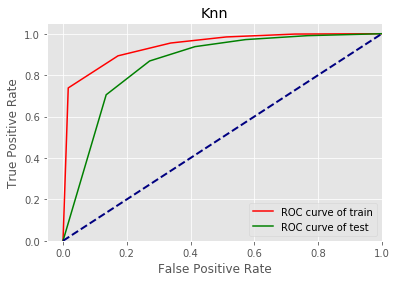

In [15]:
'''roc-curve'''
plt.figure()
lw = 2
plt.plot(knn_fpr_train, knn_tpr_train, color='red', label='ROC curve of train')
plt.plot(knn_fpr_test, knn_tpr_test, color='green', label='ROC curve of test')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn')
plt.legend(loc="lower right")
plt.show()

In [16]:
'''Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
lr_proba_train = lr.predict_proba(X_train)
lr_proba_test = lr.predict_proba(X_test)

In [18]:
lr_fpr_train, lr_tpr_train, _ = metrics.roc_curve(y_train, lr_proba_train[:,1])
lr_auc_train = metrics.auc(lr_fpr_train, lr_tpr_train)
lr_fpr_test, lr_tpr_test, _ = metrics.roc_curve(y_test, lr_proba_test[:,1])
lr_auc_test = metrics.auc(lr_fpr_test, lr_tpr_test)
print("auc_train = {:.9f}".format(lr_auc_train))
print("auc_test  = {:.9f}".format(lr_auc_test))

auc_train = 0.772135747
auc_test  = 0.775027590


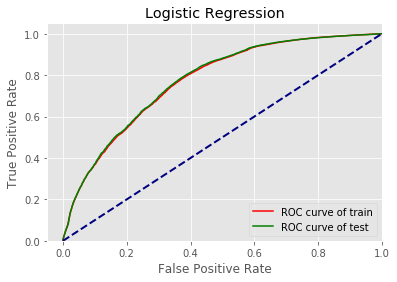

In [19]:
'''roc-curve for logistic regression'''
plt.figure()
lw = 2
plt.plot(lr_fpr_train, lr_tpr_train, color='red', label='ROC curve of train')
plt.plot(lr_fpr_test, lr_tpr_test, color='green', label='ROC curve of test')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [20]:
'''Gradient Boosting'''
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(n_estimators = 100, random_state = 11)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=11,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [21]:
gbt_proba_train = gbt.predict_proba(X_train)
gbt_proba_test = gbt.predict_proba(X_test)

In [22]:
gbt_fpr_train, gbt_tpr_train, _ = metrics.roc_curve(y_train, gbt_proba_train[:, 1])
gbt_auc_train = metrics.auc(gbt_fpr_train, gbt_tpr_train)
gbt_fpr_test, gbt_tpr_test, _ = metrics.roc_curve(y_test, gbt_proba_test[:, 1])
gbt_auc_test = metrics.auc(gbt_fpr_test, gbt_tpr_test)
print("auc_gbt_train = {:.9f}".format(gbt_auc_train))
print("auc_gbt_test  = {:.9f}".format(gbt_auc_test))

auc_gbt_train = 0.818611737
auc_gbt_test  = 0.820871347


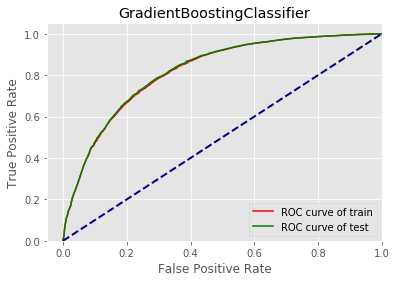

In [23]:
'''roc curve for gradient boosting'''
plt.figure()
lw = 2
plt.plot(gbt_fpr_train, gbt_tpr_train, color='red', label='ROC curve of train')
plt.plot(gbt_fpr_test, gbt_tpr_test, color='green', label='ROC curve of test')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier')
plt.legend(loc="lower right")
plt.show()

In [24]:
'''random forest'''
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                                    random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [25]:
rf_proba_train = rf.predict_proba(X_train)
rf_proba_test = rf.predict_proba(X_test)

In [26]:
rf_fpr_train, rf_tpr_train, _ = metrics.roc_curve(y_train, rf_proba_train[:, 1])
rf_auc_train = metrics.auc(rf_fpr_train, rf_tpr_train)
rf_fpr_test, rf_tpr_test, _ = metrics.roc_curve(y_test, rf_proba_test[:, 1])
rf_auc_test = metrics.auc(rf_fpr_test, rf_tpr_test)
print("rf_auc_train = {:.9f}".format(rf_auc_train))
print("rf_auc_test  = {:.9f}".format(rf_auc_test))

rf_auc_train = 0.985999342
rf_auc_test  = 0.884618085


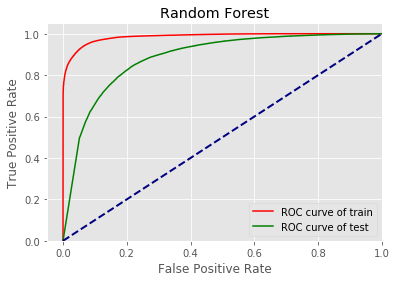

In [27]:
'''roc curve for random forest'''
plt.figure()
lw = 2
plt.plot(rf_fpr_train, rf_tpr_train, color='red', label='ROC curve of train')
plt.plot(rf_fpr_test, rf_tpr_test, color='green', label='ROC curve of test')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

In [28]:
'''try to get main features'''

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print('features importances')
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, features_name[idx], importances[idx]))

features importances
 1. feature 'amount' (0.4413)
 2. feature 'lon  ' (0.2034)
 3. feature 'lat  ' (0.1936)
 4. feature 'site_type' (0.0339)
 5. feature 'fuel_id_e0f5182f9a3115e0488a74152f9cb66cbbe38224' (0.0290)
 6. feature 'devision_id_bc70a7d61597cfe9af3a2af904f2ec292c3133ec' (0.0284)
 7. feature 'month' (0.0226)
 8. feature 'fuel_id_bd5b689b05dd83fa60590b93b4b0a0428a0fc43c' (0.0119)
 9. feature 'fuel_id_afc06e4e2f1ae009c025834fd956c0d2848ef615' (0.0070)
10. feature 'devision_id_1917d21be2460e969a9f584e23ac7fb4865c6a84' (0.0050)
11. feature 'devision_id_798edca8bc5f55d752d9f0c5f3f33c9bcda1d0bf' (0.0033)
12. feature 'devision_id_3b5d035402b5d5d1995cddb43d58128383d68f66' (0.0033)
13. feature 'devision_id_53f32719393e7ad9024f9764a4b84f5bcfb4b48a' (0.0031)
14. feature 'devision_id_ef972f02930169a9ce1236ea538662dc207884fe' (0.0030)
15. feature 'devision_id_9646360c04da5b8ea896bc818a02a23c704caa77' (0.0022)
16. feature 'fuel_id_9b9b13c1c5ac5dbb27acdbad9a860e3874d380ed' (0.0018)
17. featu

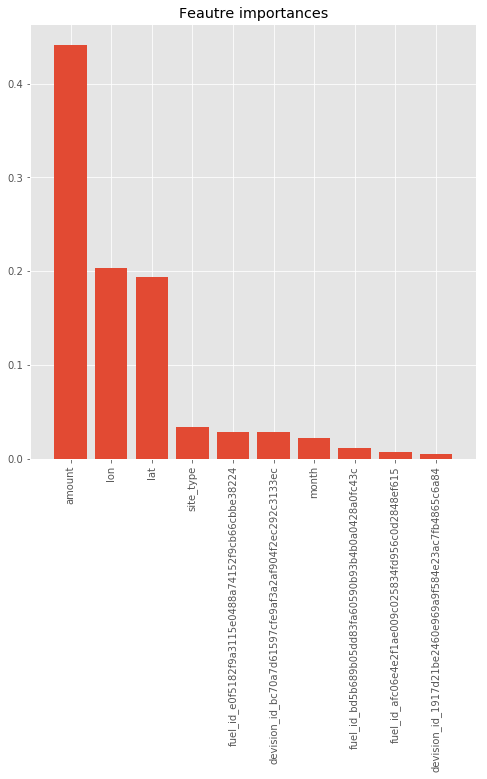

In [29]:
d_first = 10
plt.figure(figsize=(8, 8))
plt.title("Feautre importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(features_name)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [30]:
from sklearn.model_selection import GridSearchCV

samples_array = [2, 3, 10]
max_features = [3, 5, 7, 10]
rf = RandomForestClassifier(n_estimators = 100,
                                    random_state = 11)
grid = GridSearchCV(rf, param_grid={'min_samples_split': samples_array,
                                    'max_features': max_features})
grid.fit(X_train, y_train)
print('CV_error', 1 - grid.best_score_)
print('min_samples_split', grid.best_estimator_.min_samples_split)
print('max_features', grid.best_estimator_.max_features)

In [30]:
'''Launch with optimal parameters'''
optimal_min_test_split = 10
optimal_max_features = 10

rf = RandomForestClassifier(n_estimators = 100,
                              random_state = 11,
                              min_samples_split = optimal_min_test_split,
                              max_features = optimal_max_features)

rf.fit(X_train, y_train)
rf_proba_train = rf.predict_proba(X_train)
rf_fpr_train, rf_tpr_train, _ = metrics.roc_curve(y_train, rf_proba_train[:, 1])
rf_auc_train = metrics.auc(rf_fpr_train, rf_tpr_train)
rf_proba_test = rf.predict_proba(X_test)
rf_fpr_test, rf_tpr_test, _ = metrics.roc_curve(y_test, rf_proba_test[:, 1])
rf_auc_test = metrics.auc(rf_fpr_test, rf_tpr_test)
print("rf_auc_train = {:.9f}".format(rf_auc_train))
print("rf_auc_test = {:.9f}".format(rf_auc_test))

rf_auc_train = 0.971112211
rf_auc_test = 0.899079193


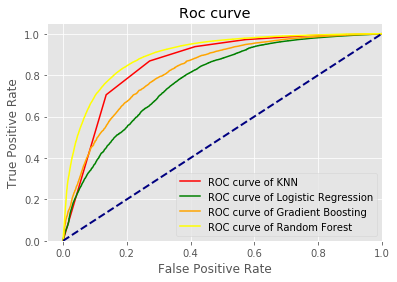

Random Forest       : 0.899079193
KNN                 : 0.857539950
Gradient Boosting   : 0.820871347
Logistic Regression : 0.775027590


In [31]:
'''final result'''
result_name = ['KNN', 'Logistic Regression', 'Gradient Boosting', 'Random Forest']
res_tpr = [knn_tpr_test, lr_tpr_test, gbt_tpr_test, rf_tpr_test]
res_fpr = [knn_fpr_test, lr_fpr_test, gbt_fpr_test, rf_fpr_test]
res_auc = [knn_auc_test, lr_auc_test, gbt_auc_test, rf_auc_test]
colors = ['red', 'green', 'orange', 'yellow']
plt.figure()
lw = 2
result = dict(zip(result_name, res_auc))
result = dict(sorted(result.items(), key = lambda x: x[1], reverse = True))
for i in range(len(result_name)):
    plt.plot(res_fpr[i], res_tpr[i], color = colors[i], label = 'ROC curve of ' + result_name[i])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.legend(loc="lower right")
plt.show()

for i in result.keys():
    print("{:20}: {:.9f}".format(i, result[i]))

In [32]:
'''predict test data'''
current_data = pd.read_csv('test.csv')
data = pd.read_csv('test.csv')

In [33]:
'''doing the same things to prepare data'''
binary_col = ['site_type', 'month']
nonbinary_col = ['fuel_id', 'devision_id']
data_nonbinary = pd.get_dummies(data[nonbinary_col])
'''normalization of data_numerical'''
data_numerical = data[['amount']]
data_numerical = (data_numerical-data_numerical.mean())/data_numerical.std()
bin_data = data[binary_col]
nonbin_data = data[nonbinary_col]
'''parse lat and long'''
coord = ['lat', 'lon']
coord_data = data[coord]
coord_data = coord_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.'), errors='coerce'))
'''create result table'''
df = pd.concat((data_nonbinary, bin_data, data_numerical, coord_data), axis = 1 )
df = pd.DataFrame(df, dtype=float)

In [34]:
'''create X and y tables'''
X = df
y = rf.predict(X)
y = np.array(y, dtype = int)

In [35]:
'''write result to csv'''
y_df = pd.DataFrame(y, columns=['y'])
result_df = pd.concat((current_data, y_df), axis = 1)
result_df.to_csv('predict.csv', index=False)